## 9.6 Homework
### 1, From web
- 1, download the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
- 2, using Fourier transform to process the image and figure out how to compress the data.
- 3, compare it with the size which you obtained via plt.savefig()

In [1]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
import os.path
from imageio import imread
from numpy.fft import fft2, ifft2, fftshift, ifftshift


%matplotlib inline

req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

# print(type(the_page))
# print(the_page[:100])

data = the_page
data = np.fromstring(data, dtype='float', sep='\n').reshape([501, 501])
#print(len(data))

The file size is:  35651 bytes.


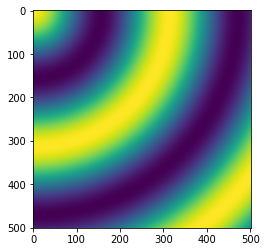

In [2]:
plt.imshow(data)
plt.savefig("image.png")
print("The file size is: ", os.path.getsize("image.png"),"bytes.")


In [3]:
def display_2(im_1, title_1, im_2, title_2):
    """
    Displays two images side by side; typically, an image and its Fourier transform.
    """
    plt.figure(figsize=(12,6))                    # Rectangular blackboard
    plt.subplot(1,2,1) ; plt.title(title_1)       # 1x2 waffle plot, 1st cell
    plt.imshow(im_1, cmap="gray")                 # Auto-equalization
    plt.subplot(1,2,2) ; plt.title(title_2)       # 1x2 waffle plot, 2nd cell
    plt.imshow(im_2, cmap="gray",vmin=-7, vmax=15) 

The file size is:  89128 bytes.


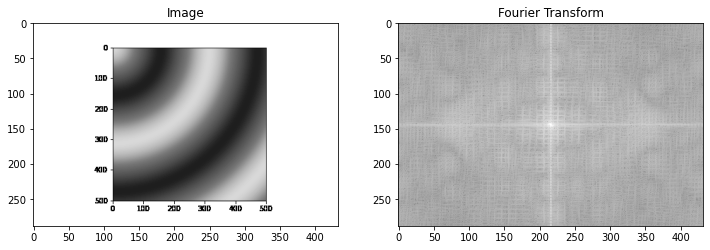

In [7]:
I = imread("image.png", as_gray=True) 

fI = fft2(I)  # Compute the Fourier transform

# Display the logarithm of the amplitutde of Fourier coefficients.
# The "fftshift" routine allows us to put the zero frequency in
# the middle, thus centering the right plot as expected.
display_2( I, "Image", 
          fftshift( np.log(1e-7 + abs(fI)) ), "Fourier Transform" )

# plt.savefig("fftshift( np.log(1e-7 + abs(fI)) ).png")
# print("The file size is: ", os.path.getsize("fftshift( np.log(1e-7 + abs(fI)) ).png"),"bytes.")


Real time representation of the function.


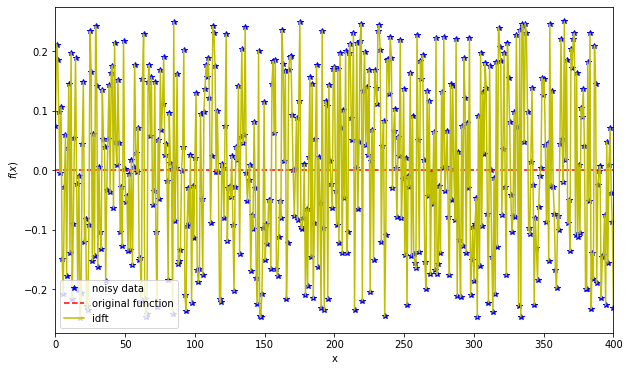

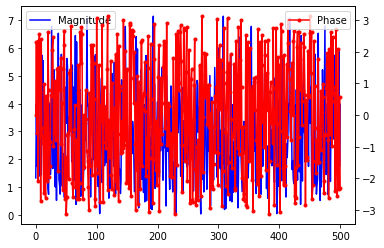

The file size is:  106809 bytes.
The file size is:  45054 bytes.


In [43]:
from cmath import exp, pi

def dft(y):
    '''
    This is a code to do discrete Fourier transform
    '''    
    N = len(y)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

def idft(c):
    '''
    This is a code to do inverse Fourier transform
    '''
    N = len(c)
    y = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            y[k] += c[n]*exp(2j*pi*k*n/N)
    return y

#define the function
f = lambda x: np.sin(50.0 * 2.0*np.pi*x)  + 0.5*np.sin(80.0 * 2.0*np.pi*x)

#define the paramters for the plot
a,b = 0,400
npoints = len(data)

#create the initial sample points (x,y)
x = np.linspace(a,b,npoints)
y = f(x) + 0.5*(np.random.rand(npoints) - 0.5)

#performat DFT and inverse dft calculations
c = dft(y)    
y1 = idft(c).real/npoints 
plt.figure(figsize=[10, 6])

#make the plot
plt.plot(x,y, 'b*', label='noisy data')
plt.plot(x,f(x), 'r--', label='original function')
plt.plot(x,y1, 'y', label='idft')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.legend(loc='lower left')
print("Real time representation of the function.")
plt.savefig("realtime.png")

plt.show()

#plot the points after DFT data
fig, ax1 = plt.subplots()
ax1.plot(np.abs(c), 'b-', label='Magnitude')

ax2 = ax1.twinx()
ax2.plot(np.angle(c), 'r.-', label='Phase')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig("dftidft.png")

plt.show()

print("The file size is: ", os.path.getsize("realtime.png"),"bytes.")
print("The file size is: ", os.path.getsize("dftidft.png"),"bytes.")

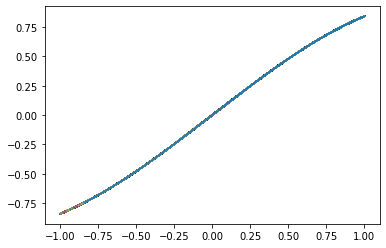

501


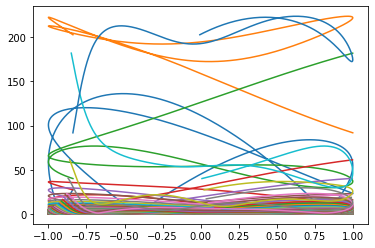

The file size is:  10558 bytes.
The file size is:  55566 bytes.


In [42]:
N = len(data)
x = data
y = np.sin(x)
plt.plot(x,y)

plt.savefig("ogdata.png")

plt.show()

yf = np.fft.fft(y)
print(len(yf))
plt.plot(x,np.abs(yf))

plt.savefig("dft.png")

plt.show()

print("The file size is: ", os.path.getsize("ogdata.png"),"bytes.")
print("The file size is: ", os.path.getsize("dft.png"),"bytes.")
